In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.interpolate import InterpolatedUnivariateSpline

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
%config InlineBackend.figure_format = 'svg'

In [2]:
def vec_running_avg(x, N_pts):
    N_pts_side = int(N_pts/2)
    x_m = np.empty(len(x)-N_pts)
    
    for i in range(len(x)-N_pts):
        tmpx = np.array(x[N_pts_side+i:N_pts_side+i+N_pts])
        # x_m[i] = np.mean(tmpx)
        # x_m[i] = np.median(tmpx)
        x_m[i] = stats.trim_mean(tmpx, 0.2)
        
    return x_m


col = [[0.22352941, 0.23137255, 0.4745098 , 1.0], [0.32156863, 0.32941176, 0.63921569, 1.0],
        [0.41960784, 0.43137255, 0.81176471, 1.0], [0.61176471, 0.61960784, 0.87058824, 1.0],
        [0.54901961, 0.42745098, 0.19215686, 1.0], [0.74117647, 0.61960784, 0.22352941, 1.0],
        [0.90588235, 0.72941176, 0.32156863, 1.0], [0.90588235, 0.79607843, 0.58039216, 1.0],
        [0.51764706, 0.23529412, 0.22352941, 1.0], [0.67843137, 0.28627451, 0.29019608, 1.0],
        [0.83921569, 0.38039216, 0.41960784, 1.0], [0.90588235, 0.58823529, 0.61176471, 1.0],
        [0.38823529, 0.4745098, 0.22352941 , 1.0], [0.54901961, 0.63529412, 0.32156863, 1.0],
        [0.70980392, 0.81176471, 0.41960784, 1.0], [0.80784314, 0.85882353, 0.61176471, 1.0]]

def ax_annotate(axis, x, y, dates_running, title_sec):

    def ax_dot(axis, text, x,y,dates, date, col):
        idx = np.argwhere(dates==date)[0][0]
        # x_m, y_m = x[idx], y[idx]
        k = 5
        x_m, y_m = np.mean(x[idx-k:idx+k]), np.mean(y[idx-k:idx+k])
        axis.plot(x_m,y_m, marker=(20, 0, 0), markersize=9, linestyle='None', alpha=0.7, label=text, color=col)

    if title_sec:
        axis.plot(200,200,c='white', label='1st WAVE')
    ax_dot(axis, '2020-03-09 - lockdown', x,y,dates_running, '2020-03-09T18:00:00', col=col[0])
    ax_dot(axis, '2020-03-28 - Int. Therapy peak (~4100)', x,y,dates_running, '2020-03-28T17:00:00', col=col[1])
    ax_dot(axis, '2020-05-04 - `phase 2`', x,y,dates_running, '2020-05-04T17:00:00', col=col[2])
    ax_dot(axis, '2020-06-15 - `phase 3`', x,y,dates_running, '2020-06-15T17:00:00', col=col[3])

    if title_sec:
        axis.plot(200,200,c='white', label='2nd WAVE')
    ax_dot(axis, '2020-10-11 - state of emergency extended', x,y,dates_running, '2020-10-11T17:00:00', col=col[4])
    ax_dot(axis, '2020-10-26 - closures + protests', x,y,dates_running, '2020-10-26T17:00:00', col=col[5])
    ax_dot(axis, '2020-11-06 - `yellow/orange/red zones`', x,y,dates_running, '2020-11-06T17:00:00', col=col[6])
    ax_dot(axis, '2020-11-21 - Int. Therapy peak (~3800)', x,y,dates_running, '2020-11-21T17:00:00', col=col[7])

    if title_sec:   
        axis.plot(200,200,c='white', label='3rd WAVE')
    ax_dot(axis, '2021-01-21 - first vax + new variants', x,y,dates_running, '2021-01-21T17:00:00', col=col[8])
    ax_dot(axis, '2021-03-08 - schools closed', x,y,dates_running, '2021-03-10T17:00:00', col=col[9])
    ax_dot(axis, '2021-03-28 - Int. Therapy peak (~3700)', x,y,dates_running, '2021-03-30T17:00:00', col=col[10])
    ax_dot(axis, '2021-04-26 - schools opened if yellow/orange', x,y,dates_running, '2021-04-26T17:00:00', col=col[11])

    if title_sec:
        axis.plot(200,200,c='white', label='4th WAVE (?)')
    ax_dot(axis, '2021-07-23 - state of emergency extended', x,y,dates_running, '2021-07-23T17:00:00', col=col[12])
    ax_dot(axis, '2021-09-01 - 60% fully vax + green pass', x,y,dates_running, '2021-09-01T17:00:00', col=col[13])
    ax_dot(axis, '2021-11-30 - Omicron variant flex?', x,y,dates_running, '2021-11-30T17:00:00', col=col[14])
    # ax_dot(axis, '2022-01-01', x,y,dates_running, '2022-01-01T17:00:00', col=col[15])


In [3]:
os.system('curl -O https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 92328  100 92328    0     0   625k      0 --:--:-- --:--:-- --:--:--  630k


0

In [4]:
data  = np.genfromtxt('dpc-covid19-ita-andamento-nazionale.csv', delimiter=',', names=True)
dates = np.genfromtxt('dpc-covid19-ita-andamento-nazionale.csv', delimiter=',', usecols=0, dtype='U20')
today = dates[-1][:-9]
# print(data.dtype.names)
# print(dates)

In [5]:
# Running mean points (must be even)
N_pts      = 8
N_pts_side = int(N_pts/2)
dates_run  = dates[N_pts_side:-N_pts_side]

arrow_days = 5
qual_trend = False

In [6]:
daily_tests   = np.insert(np.diff(data['tamponi']),0,0)
daily_cases   = data['nuovi_positivi']
daily_deaths  = np.insert(np.diff(data['deceduti']),0,0)

int_therapy   = data['terapia_intensiva']
quarantined   = data['isolamento_domiciliare']

/tmp/ipykernel_1796/354891102.py:5: RuntimeWarning: divide by zero encountered in true_divide
  daily_cases/daily_tests, daily_cases/daily_tests, int_therapy]


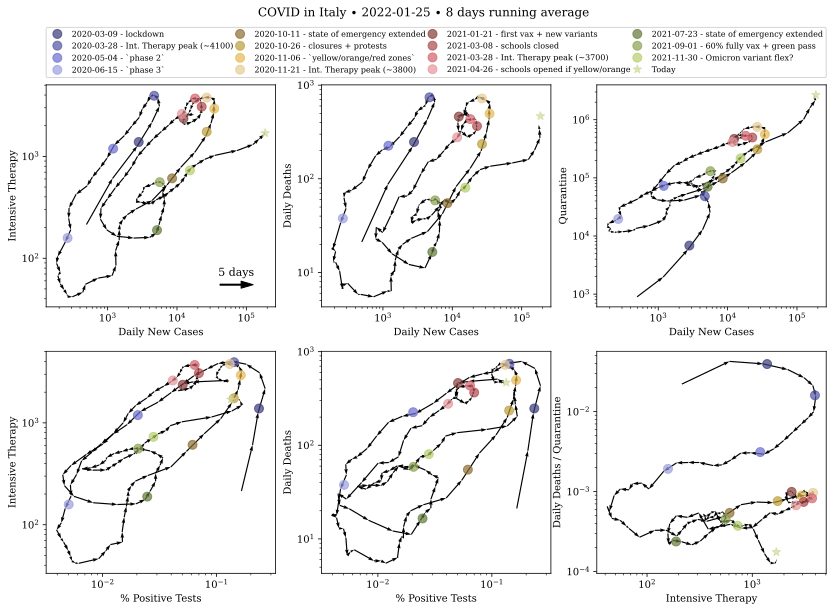

In [7]:
fig, ax = plt.subplots(2,3, figsize=(14,9))
ax = ax.flatten()

xs =  [daily_cases, daily_cases, daily_cases,
       daily_cases/daily_tests, daily_cases/daily_tests, int_therapy]
lxs = [r'Daily New Cases', r'Daily New Cases', r'Daily New Cases',
       r'% Positive Tests', r'% Positive Tests', r'Intensive Therapy']

ys =  [int_therapy, daily_deaths, quarantined, 
       int_therapy, daily_deaths, daily_deaths/quarantined]
lys = [r'Intensive Therapy', r'Daily Deaths', r'Quarantine',
       r'Intensive Therapy', r'Daily Deaths', r'Daily Deaths / Quarantine']

for i, (x,y) in enumerate(zip(xs,ys)): 
      x_run, y_run = vec_running_avg(x, N_pts), vec_running_avg(y, N_pts)
      xrid, yrid = x_run[::arrow_days], y_run[::arrow_days]
      ax[i].quiver(xrid[:-1], yrid[:-1], xrid[1:]-xrid[:-1], yrid[1:]-yrid[:-1], scale_units='xy', angles='xy', scale=1)
      
      ax_annotate(ax[i],x_run,y_run,dates_run, title_sec=False)

      idx = np.argwhere(dates==today+'T17:00:00')[0][0]
      ax[i].plot(x[idx-1],y[idx-1], marker='*', markersize=9, linestyle='None', alpha=0.7, label='Today', color=col[15])

      ax[i].set_ylabel(lys[i])
      ax[i].set_xlabel(lxs[i])
      ax[i].set_xscale('log')
      ax[i].set_yscale('log')


# VERY QUALITATIVE TRENDS (using the last 2 weeks)
if qual_trend:
       p0 = np.poly1d(np.polyfit(xs[0][-15:-2], ys[0][-15:-2], deg=2))
       p1 = np.poly1d(np.polyfit(xs[1][-15:-2], ys[1][-15:-2], deg=1))
       p2 = np.poly1d(np.polyfit(xs[2][-15:-2], ys[2][-15:-2], deg=1))
       p3 = np.poly1d(np.polyfit(xs[3][-15:-2], ys[3][-15:-2], deg=1))
       p4 = np.poly1d(np.polyfit(xs[4][-15:-2], ys[4][-15:-2], deg=1))
       x_extr = np.linspace(3e4, 1e6, 20)
       ax[0].plot(x_extr, p0(x_extr), 'r--', zorder=0)
       ax[1].plot(x_extr, p1(x_extr), 'r--', zorder=0)
       ax[2].plot(x_extr, p2(x_extr), 'r--', zorder=0)
       x_extr = np.linspace(0.1, 0.32, 20)
       ax[3].plot(x_extr, p3(x_extr), 'r--', zorder=0)
       ax[4].plot(x_extr, p4(x_extr), 'r--', zorder=0)

        
# Arrow ruler
ax[0].annotate('{:d} days'.format(arrow_days), (0.75, .14), xytext=(0.75, .14), xycoords='axes fraction', fontsize=11)
ax[0].annotate('', (0.91, .1),xytext=(0.75, 0.1), xycoords='axes fraction',fontsize=12,
            arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=7))

# Legend
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels,bbox_to_anchor=(0.125, .23, 0.775, 1.4), loc='center left', mode="expand", borderaxespad=0, fontsize=8, ncol=4,)

plt.suptitle(r'COVID in Italy $\bullet$ {:s} $\bullet$ {:d} days running average'.format(today, N_pts), y=1.)

fig.savefig('./plots/jpg/'+today+'_running'+str(N_pts)+'.jpg', bbox_inches='tight',dpi=200)
fig.savefig('./plots/pdf/'+today+'_running'+str(N_pts)+'.pdf', bbox_inches='tight')
fig.savefig('./plots/latest.jpg', bbox_inches='tight',dpi=200)
fig.savefig('./plots/latest.svg', bbox_inches='tight')

plt.show()